In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential

import copy
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Train Data

# Hidden_Units = 4 ;RMSE

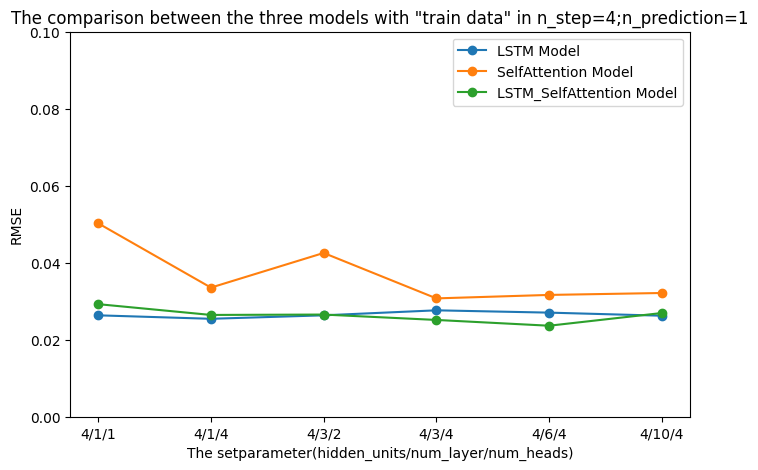

In [27]:
# RMSE with n_step=4;n_prediction=1
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0263,0.0254,0.0263,0.0276,0.0270,0.0262]
group_SA = [0.0502,0.0335,0.0425,0.0307,0.0316,0.0321]
group_LSA = [0.0292,0.0264,0.0265,0.0251,0.0236,0.0269]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=4;n_prediction=1')
plt.legend()
plt.show()

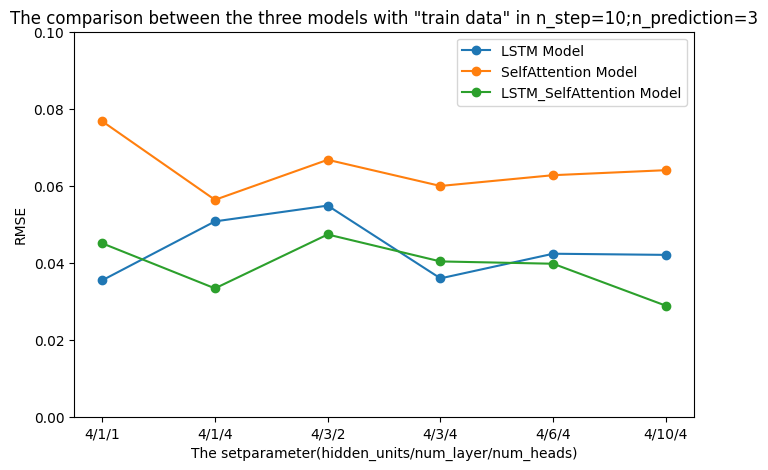

In [28]:
# RMSE with n_step=10;n_prediction=3
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0354,0.0507,0.0548,0.0359,0.0423,0.0420]
group_SA = [0.0767,0.0563,0.0667,0.0599,0.0627,0.0640]
group_LSA = [0.0450,0.0333,0.0473,0.0403,0.0397,0.0288]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=10;n_prediction=3')
plt.legend()
plt.show()

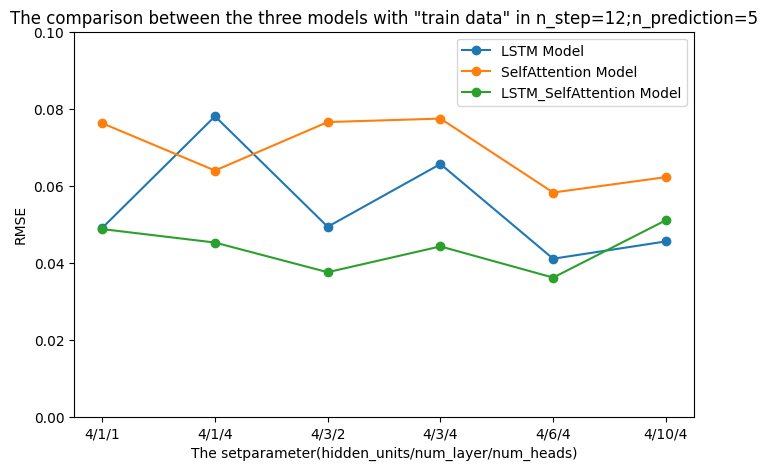

In [29]:
# RMSE with n_step=12;n_prediction=5
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0490,0.0780,0.0493,0.0656,0.0410,0.0455]
group_SA = [0.0762,0.0639,0.0765,0.0774,0.0582,0.0622]
group_LSA = [0.0487,0.0452,0.0375,0.0442,0.0361,0.0510]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=12;n_prediction=5')
plt.legend()
plt.show()

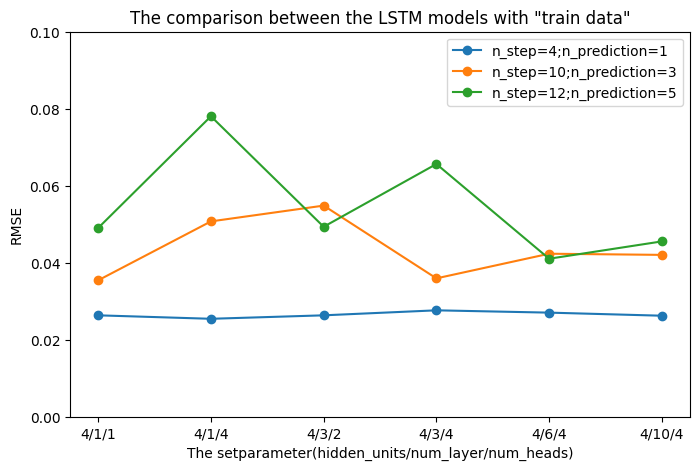

In [30]:
# RMSE with LSTM
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0263,0.0254,0.0263,0.0276,0.0270,0.0262]
group_2 = [0.0354,0.0507,0.0548,0.0359,0.0423,0.0420]
group_3 = [0.0490,0.0780,0.0493,0.0656,0.0410,0.0455]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM models with "train data"')
plt.legend()
plt.show()

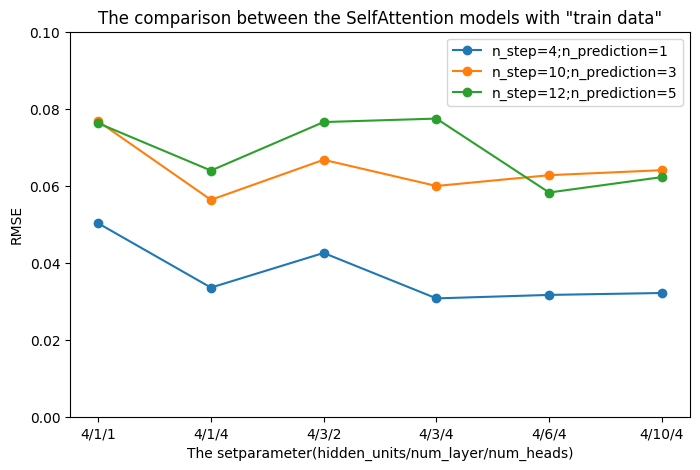

In [31]:
# RMSE with SelfAttention
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0502,0.0335,0.0425,0.0307,0.0316,0.0321]
group_2 = [0.0767,0.0563,0.0667,0.0599,0.0627,0.0640]
group_3 = [0.0762,0.0639,0.0765,0.0774,0.0582,0.0622]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the SelfAttention models with "train data"')
plt.legend()
plt.show()

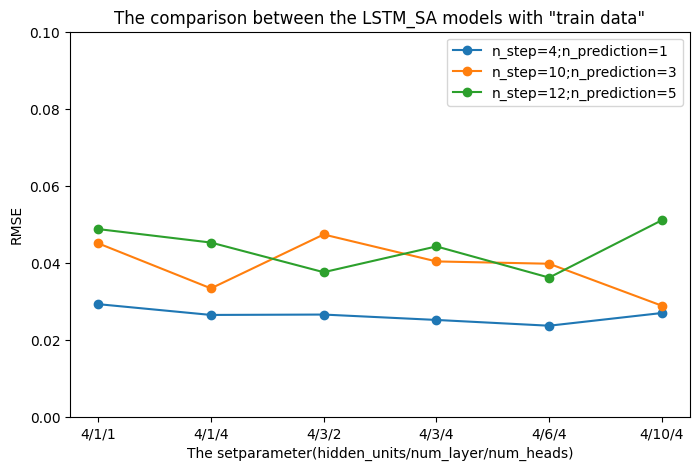

In [32]:
# RMSE with LSTM_SA
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0292,0.0264,0.0265,0.0251,0.0236,0.0269]
group_2 = [0.0450,0.0333,0.0473,0.0403,0.0397,0.0288]
group_3 = [0.0487,0.0452,0.0375,0.0442,0.0361,0.0510]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM_SA models with "train data"')
plt.legend()
plt.show()

# Hidden_Units = 8 ;RMSE

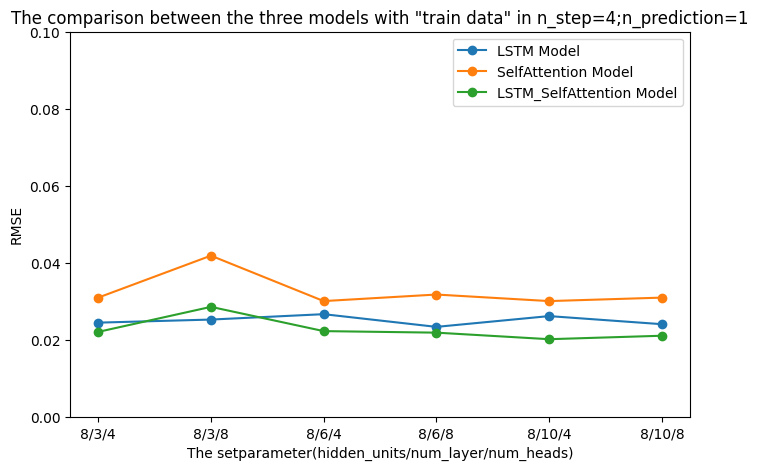

In [33]:
# RMSE with n_step=4;n_prediction=1
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0244,0.0252,0.0266,0.0233,0.0261,0.0240]
group_SA = [0.0309,0.0418,0.0300,0.0317,0.0300,0.0309]
group_LSA = [0.0220,0.0285,0.0222,0.0218,0.0201,0.0210]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=4;n_prediction=1')
plt.legend()
plt.show()

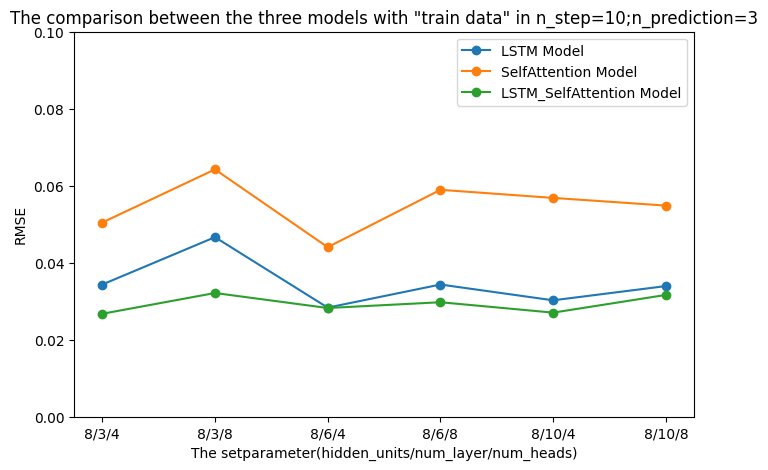

In [34]:
# RMSE with n_step=10;n_prediction=3
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0343,0.0466,0.0283,0.0343,0.0302,0.0339]
group_SA = [0.0504,0.0642,0.0440,0.0589,0.0568,0.0548]
group_LSA = [0.0267,0.0321,0.0282,0.0297,0.0270,0.0316]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=10;n_prediction=3')
plt.legend()
plt.show()

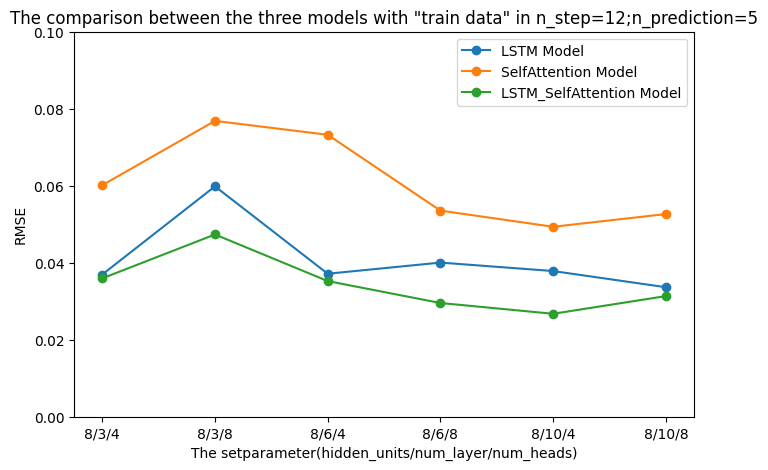

In [35]:
# RMSE with n_step=12;n_prediction=5
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0369,0.0598,0.0371,0.0400,0.0378,0.0336]
group_SA = [0.0601,0.0768,0.0732,0.0535,0.0493,0.0526]
group_LSA = [0.0359,0.0473,0.0352,0.0295,0.0267,0.0313]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "train data" in n_step=12;n_prediction=5')
plt.legend()
plt.show()

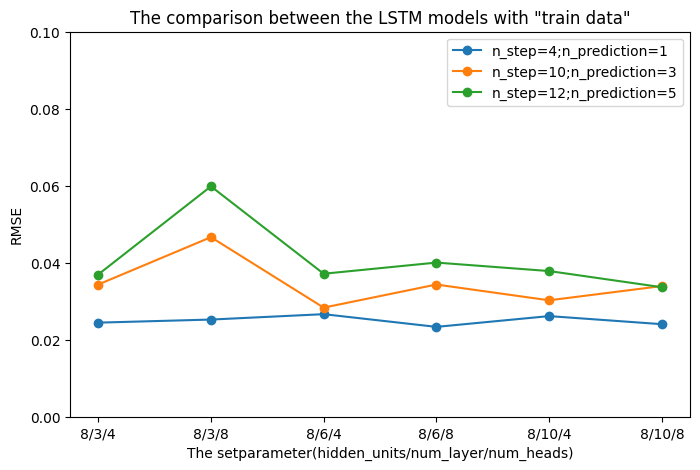

In [36]:
# RMSE with LSTM
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0244,0.0252,0.0266,0.0233,0.0261,0.0240]
group_2 = [0.0343,0.0466,0.0283,0.0343,0.0302,0.0339]
group_3 = [0.0369,0.0598,0.0371,0.0400,0.0378,0.0336]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM models with "train data"')
plt.legend()
plt.show()

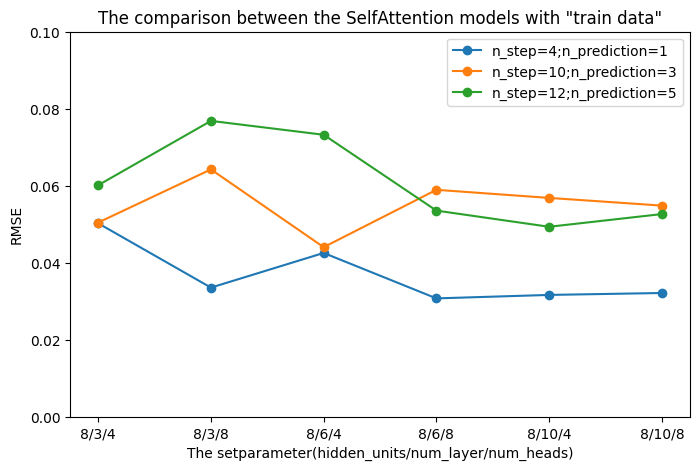

In [37]:
# RMSE with SelfAttention
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0502,0.0335,0.0425,0.0307,0.0316,0.0321]
group_2 = [0.0504,0.0642,0.0440,0.0589,0.0568,0.0548]
group_3 = [0.0601,0.0768,0.0732,0.0535,0.0493,0.0526]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the SelfAttention models with "train data"')
plt.legend()
plt.show()

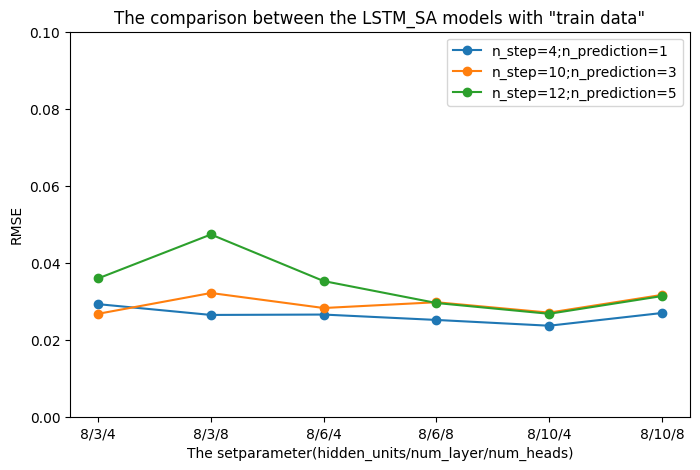

In [38]:
# RMSE with LSTM_SA
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0292,0.0264,0.0265,0.0251,0.0236,0.0269]
group_2 = [0.0267,0.0321,0.0282,0.0297,0.0270,0.0316]
group_3 = [0.0359,0.0473,0.0352,0.0295,0.0267,0.0313]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM_SA models with "train data"')
plt.legend()
plt.show()

# Test Data

# Hidden_Units = 4 ;RMSE

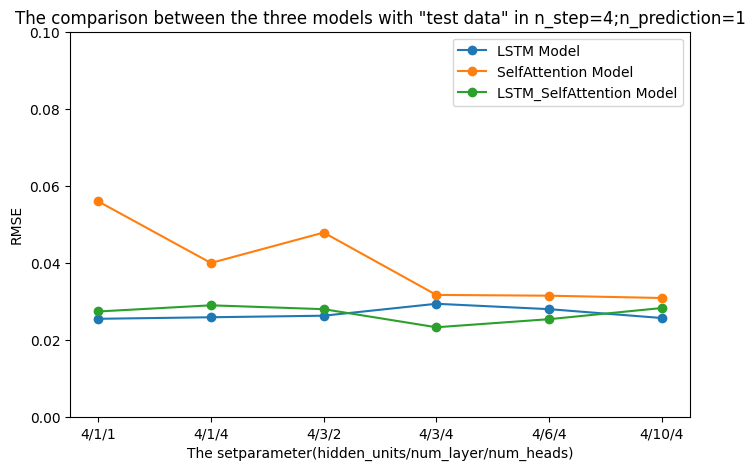

In [39]:
# RMSE with n_step=4;n_prediction=1
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0254,0.0258,0.0262,0.0293,0.0279,0.0256]
group_SA = [0.0559,0.0399,0.0478,0.0316,0.0314,0.0308]
group_LSA = [0.0273,0.0289,0.0279,0.0232,0.0253,0.0282]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=4;n_prediction=1')
plt.legend()
plt.show()

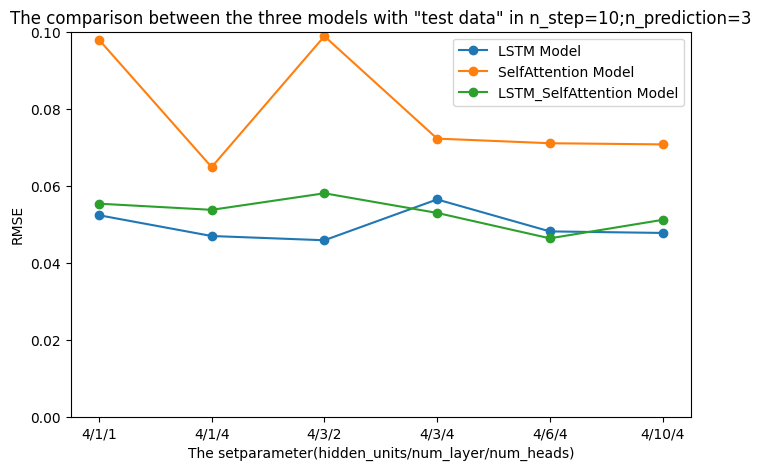

In [40]:
# RMSE with n_step=10;n_prediction=3
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0523,0.0469,0.0458,0.0564,0.0481,0.0477]
group_SA = [0.0979,0.0648,0.0988,0.0722,0.0710,0.0707]
group_LSA = [0.0553,0.0537,0.0580,0.0529,0.0463,0.0511]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=10;n_prediction=3')
plt.legend()
plt.show()

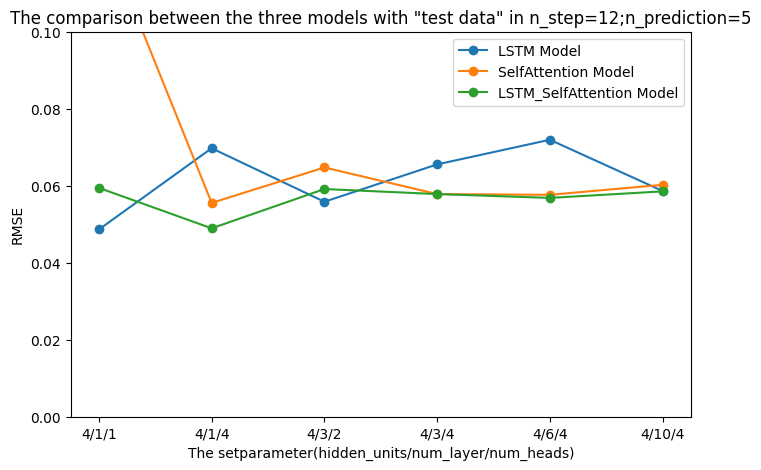

In [41]:
# RMSE with n_step=12;n_prediction=5
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_L = [0.0486,0.0697,0.0558,0.0655,0.0719,0.0586]
group_SA = [0.1282,0.0555,0.0647,0.0578,0.0576,0.0602]
group_LSA = [0.0594,0.0489,0.0591,0.0578,0.0568,0.0585]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=12;n_prediction=5')
plt.legend()
plt.show()

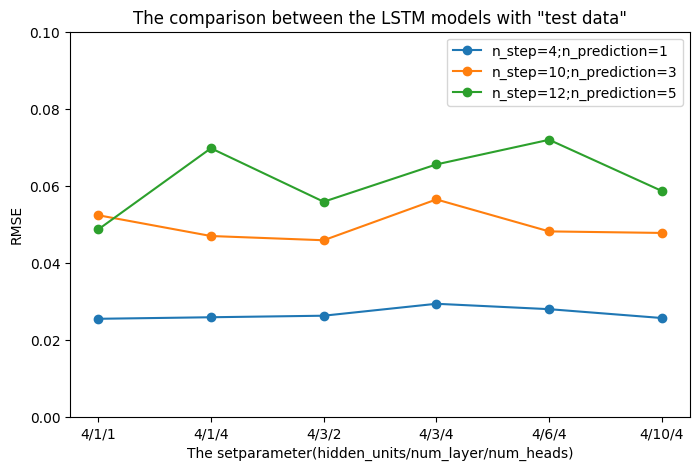

In [42]:
# RMSE with LSTM
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0254,0.0258,0.0262,0.0293,0.0279,0.0256]
group_2 = [0.0523,0.0469,0.0458,0.0564,0.0481,0.0477]
group_3 = [0.0486,0.0697,0.0558,0.0655,0.0719,0.0586]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM models with "test data"')
plt.legend()
plt.show()

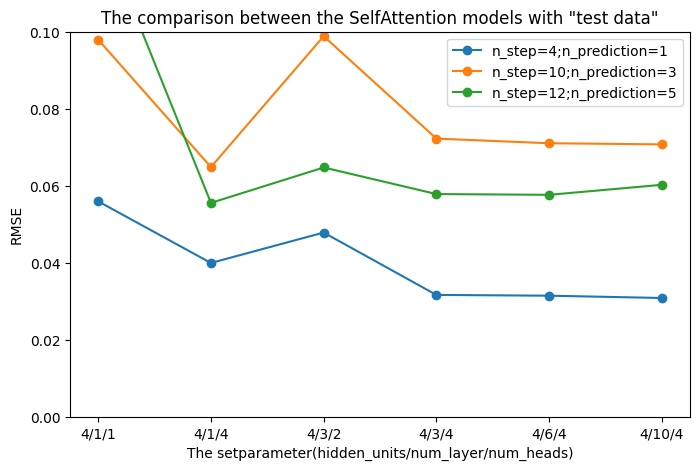

In [43]:
# RMSE with SelfAttention
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0559,0.0399,0.0478,0.0316,0.0314,0.0308]
group_2 = [0.0979,0.0648,0.0988,0.0722,0.0710,0.0707]
group_3 = [0.1282,0.0555,0.0647,0.0578,0.0576,0.0602]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the SelfAttention models with "test data"')
plt.legend()
plt.show()

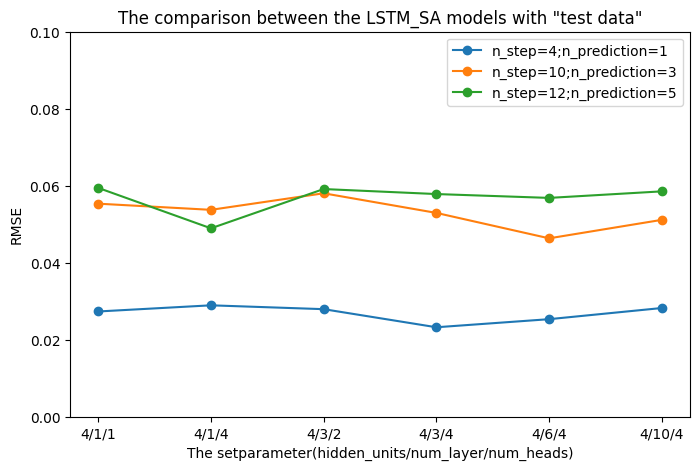

In [44]:
# RMSE with LSTM_SA
group = ["4/1/1","4/1/4","4/3/2","4/3/4","4/6/4","4/10/4"]
group_1 = [0.0273,0.0289,0.0279,0.0232,0.0253,0.0282]
group_2 = [0.0553,0.0537,0.0580,0.0529,0.0463,0.0511]
group_3 = [0.0594,0.0489,0.0591,0.0578,0.0568,0.0585]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM_SA models with "test data"')
plt.legend()
plt.show()

# Hidden_Units = 8 ;RMSE

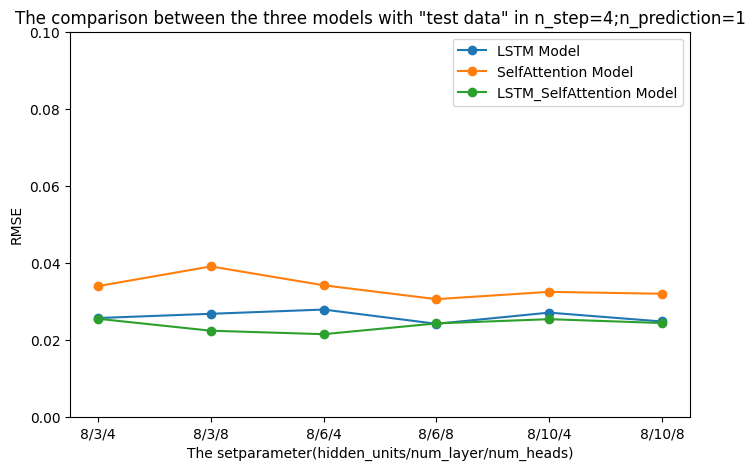

In [45]:
# RMSE with n_step=4;n_prediction=1
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0256,0.0267,0.0278,0.0241,0.0270,0.0247]
group_SA = [0.0339,0.0390,0.0341,0.0305,0.0324,0.0319]
group_LSA = [0.0254,0.0223,0.0214,0.0242,0.0253,0.0243]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=4;n_prediction=1')
plt.legend()
plt.show()

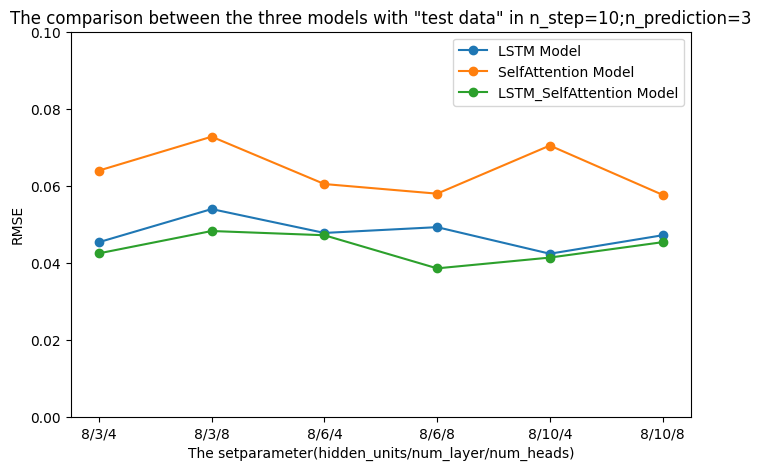

In [46]:
# RMSE with n_step=10;n_prediction=3
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0453,0.0539,0.0477,0.0492,0.0423,0.0471]
group_SA = [0.0639,0.0727,0.0604,0.0579,0.0704,0.0576]
group_LSA = [0.0424,0.0482,0.0471,0.0385,0.0413,0.0453]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=10;n_prediction=3')
plt.legend()
plt.show()

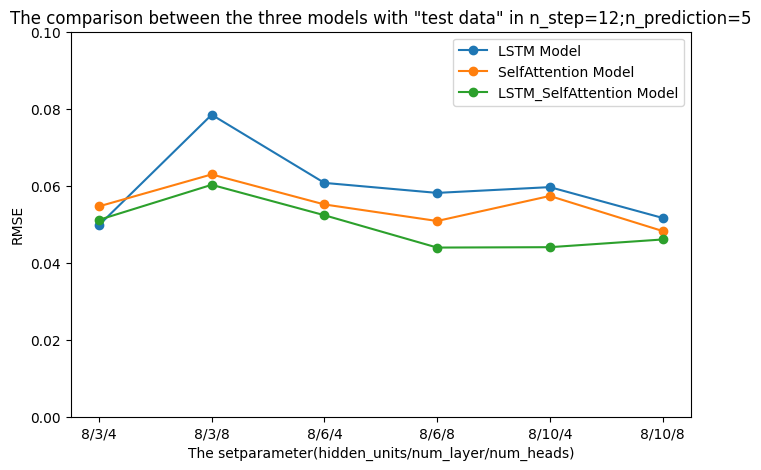

In [47]:
# RMSE with n_step=12;n_prediction=5
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_L = [0.0497,0.0784,0.0607,0.0581,0.0596,0.0516]
group_SA = [0.0546,0.0629,0.0551,0.0508,0.0573,0.0482]
group_LSA = [0.0511,0.0602,0.0523,0.0439,0.0440,0.0460]
plt.figure(figsize=(8,5))
plt.plot(group,group_L, label='LSTM Model', marker="o")
plt.plot(group,group_SA, label='SelfAttention Model', marker="o")
plt.plot(group,group_LSA, label='LSTM_SelfAttention Model', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the three models with "test data" in n_step=12;n_prediction=5')
plt.legend()
plt.show()

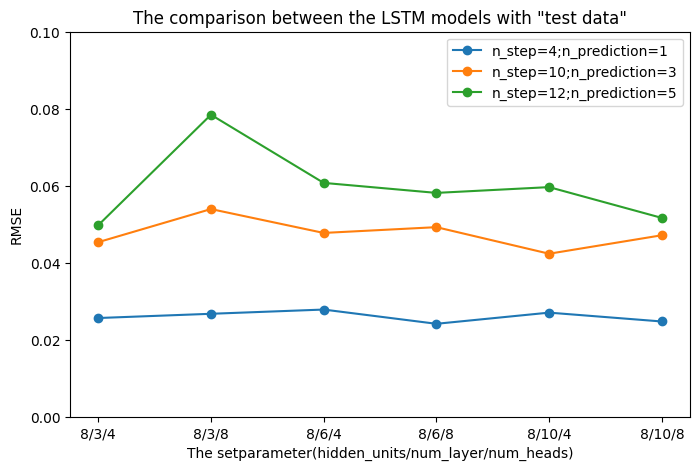

In [48]:
# RMSE with LSTM
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0256,0.0267,0.0278,0.0241,0.0270,0.0247]
group_2 = [0.0453,0.0539,0.0477,0.0492,0.0423,0.0471]
group_3 = [0.0497,0.0784,0.0607,0.0581,0.0596,0.0516]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM models with "test data"')
plt.legend()
plt.show()

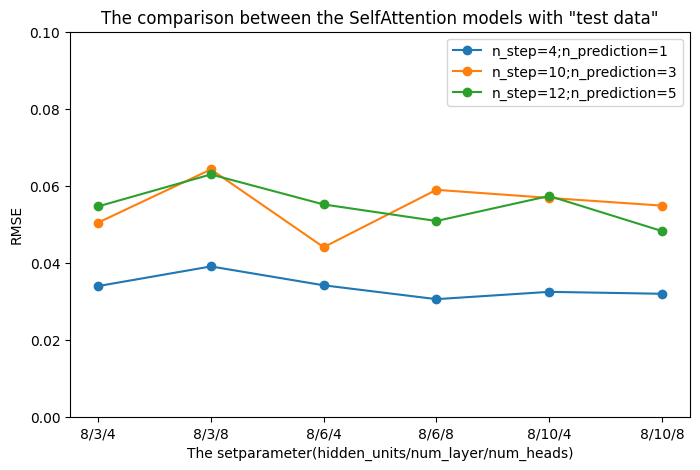

In [49]:
# RMSE with SelfAttention
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0339,0.0390,0.0341,0.0305,0.0324,0.0319]
group_2 = [0.0504,0.0642,0.0440,0.0589,0.0568,0.0548]
group_3 = [0.0546,0.0629,0.0551,0.0508,0.0573,0.0482]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the SelfAttention models with "test data"')
plt.legend()
plt.show()

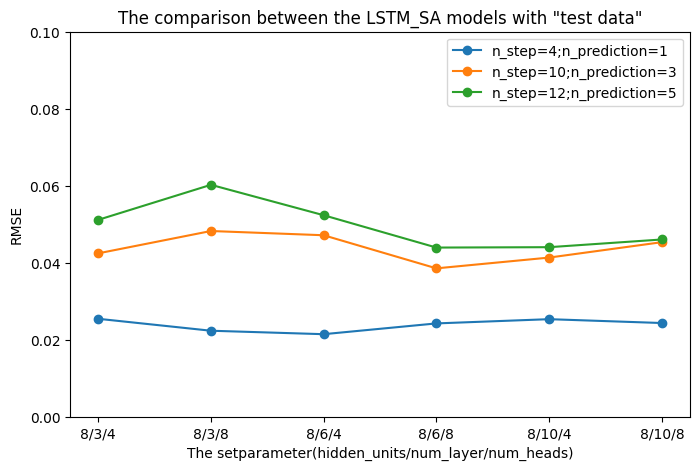

In [50]:
# RMSE with LSTM_SA
group = ["8/3/4","8/3/8","8/6/4","8/6/8","8/10/4","8/10/8"]
group_1 = [0.0254,0.0223,0.0214,0.0242,0.0253,0.0243]
group_2 = [0.0424,0.0482,0.0471,0.0385,0.0413,0.0453]
group_3 = [0.0511,0.0602,0.0523,0.0439,0.0440,0.0460]
plt.figure(figsize=(8,5))
plt.plot(group,group_1, label='n_step=4;n_prediction=1', marker="o")
plt.plot(group,group_2, label='n_step=10;n_prediction=3', marker="o")
plt.plot(group,group_3, label='n_step=12;n_prediction=5', marker="o")
plt.xlabel('The setparameter(hidden_units/num_layer/num_heads)')
plt.ylabel('RMSE')
plt.ylim((0, 0.1))
plt.title('The comparison between the LSTM_SA models with "test data"')
plt.legend()
plt.show()